In [ ]:
library(pastecs)
library(ggplot2)
library(ggpubr)
library(Hmisc)
library(ggpubr)
library(corrplot)
library(plyr)
library(multcomp)
library(afex)
library(tidyr)
library(ggsignif)
library(ltm)
# library(tidyverse)
library(rms)
library(wesanderson) # color package
library(psych) #EFA
library(lavaan)
library(semPlot)
library(semTools)
library(dplyr)
library(knitr)
library(MVN)
library(lavaanPlot)
library ( semTable )
# library(corrgram)
# library(tidyverse)
library(ggpubr)
library(rstatix)
library(broom)
library(multcomp)
library(xtable)  
par(bg = "#f7f7f7")

In [94]:
## read  csv
cds_df = read.csv('./Condition_csv/allCondition.csv')
llm_df = read.csv('./Condition_csv/llm_data.csv')
label_df = read.csv('./Condition_csv/labels_data.csv')

In [13]:
table(cds_df$condition)


Explanation    Hashtags       Label     noLabel 
         60          60          60          60 

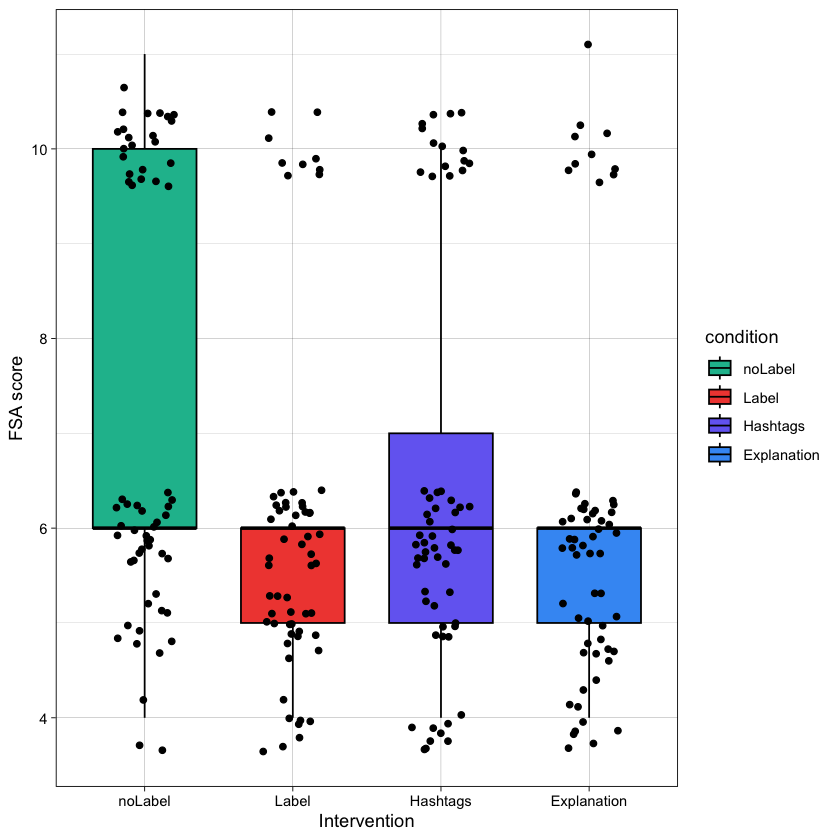

In [45]:
ggboxplot(cds_df, x = "condition", y = "fsa_score", fill = "condition",
           palette = c("#1ABC9C","#F14B3F", "#756DF2", "#419af4" ),
          order = c("noLabel", "Label", "Hashtags", "Explanation"),
          ylab = "FSA score", xlab = "Intervention", add = "jitter") + theme_linedraw()  
ggsave("./Figures/fsalabels_all.pdf",  width=8, height=5,dpi=700)

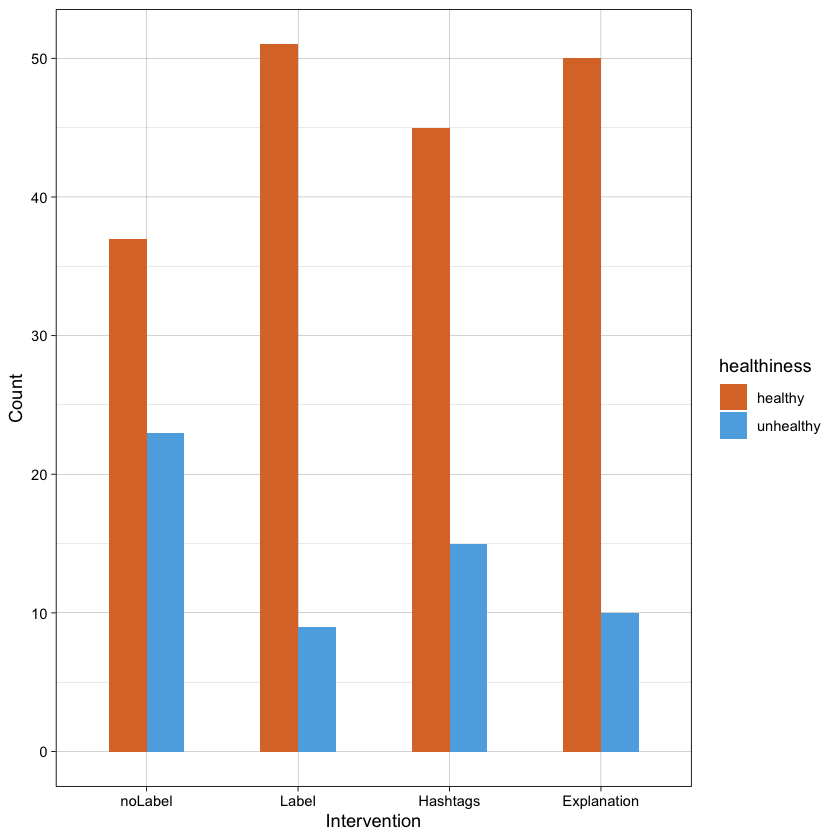

In [119]:
cds_df$condition <- factor(cds_df$condition, levels =  c("noLabel", "Label", "Hashtags", "Explanation"))
choice_dist_polot  = ggplot(data = cds_df, aes(x=condition, group = healthiness, fill=healthiness), ) + geom_bar(width=0.5,position = position_dodge(width=0.5)) + labs(x="Intervention", y='Count') + scale_fill_manual(values = c( "#DC7633","#5DADE2"))+theme_linedraw()  
choice_dist_polot
ggsave("./Figures/condition_dist.pdf",  width=8, height=5,dpi=700)

In [52]:
# Compute mean and std for each group
mean_by_group <- tapply(cds_df$fsa_score, cds_df$condition, mean)
std_by_group <- tapply(cds_df$fsa_score, cds_df$condition, sd)


# Print results
print(mean_by_group)
print(std_by_group)

    noLabel       Label    Hashtags Explanation 
   7.283333    6.033333    6.533333    6.116667 
    noLabel       Label    Hashtags Explanation 
   2.255627    1.813010    2.134992    1.940572 


### ANOVA across all

In [ ]:
## compute the mean difference across condition
Fsa_mean.model <- fsa_score ~ condition 
Fsa_mean.fit <- lm(Fsa_mean.model, data = cds_df)
summary <- summary(Fsa_mean.fit)
summary


Call:
lm(formula = Fsa_mean.model, data = cds_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2833 -1.2833 -0.5333 -0.0333  4.8833 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.2833     0.2638  27.612  < 2e-16 ***
conditionLabel        -1.2500     0.3730  -3.351 0.000938 ***
conditionHashtags     -0.7500     0.3730  -2.011 0.045514 *  
conditionExplanation  -1.1667     0.3730  -3.127 0.001985 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.043 on 236 degrees of freedom
Multiple R-squared:  0.05627,	Adjusted R-squared:  0.04428 
F-statistic: 4.691 on 3 and 236 DF,  p-value: 0.003346


In [ ]:
## introducing Dummies variables
# Create dummy variables for the 'condition' variable
df_dummies  = cds_df

# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = df_dummies)

# Combine the dummy variables with the original dataset (optional)
df_dummies <- cbind(df_dummies, dummies)

,person,age,country,education,gender,FK_9,FK_10,FK_11,FK_12,sus_1,⋯,condition,n_condition,satisfaction,persuasiveness,llm_hashtag,llm_explanation,conditionnoLabel,conditionLabel,conditionHashtags,conditionExplanation
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1003,b25_35,GB,BA,Male,4,4,4,2,5,⋯,noLabel,0,NA,NA,,,1,0,0,0
2,1006,b35_45,GB,High_school,Female,4,4,4,2,5,⋯,noLabel,0,NA,NA,,,1,0,0,0
3,1008,b25_35,GB,MSc,Male,5,4,4,1,4,⋯,noLabel,0,NA,NA,,,1,0,0,0
4,1011,b25_35,GB,BA,Female,3,4,3,2,4,⋯,noLabel,0,NA,NA,,,1,0,0,0
5,1009,b25_35,GB,BA,Male,5,5,5,1,3,⋯,noLabel,0,NA,NA,,,1,0,0,0
6,1012,b35_45,GB,MSc,Female,4,4,4,2,4,⋯,noLabel,0,NA,NA,,,1,0,0,0


#### Fsa with dummies

In [ ]:
Fsa_mean_dummies.model <- fsa_score ~ conditionHashtags+conditionExplanation +conditionLabel+conditionnoLabel
Fsa_mean.fit <- lm(Fsa_mean_dummies.model, data = df_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_mean_dummies.model, data = df_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2833 -1.2833 -0.5333 -0.0333  4.8833 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.2833     0.2638  27.612  < 2e-16 ***
conditionHashtags     -0.7500     0.3730  -2.011 0.045514 *  
conditionExplanation  -1.1667     0.3730  -3.127 0.001985 ** 
conditionLabel        -1.2500     0.3730  -3.351 0.000938 ***
conditionnoLabel           NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.043 on 236 degrees of freedom
Multiple R-squared:  0.05627,	Adjusted R-squared:  0.04428 
F-statistic: 4.691 on 3 and 236 DF,  p-value: 0.003346



In [87]:
## Anova test 
anova_FSA= aov(fsa_score  ~ conditionLabel+conditionExplanation+conditionHashtags+conditionnoLabel, data = df_dummies)
summary(anova_FSA)

                      Df Sum Sq Mean Sq F value Pr(>F)  
conditionLabel         1   16.8  16.806   4.026 0.0460 *
conditionExplanation   1   25.1  25.069   6.005 0.0150 *
conditionHashtags      1   16.9  16.875   4.042 0.0455 *
Residuals            236  985.2   4.175                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
Labels_fsa_posthoc <- TukeyHSD(anova_result,  conf.level = 0.95)
Labels_fsa_posthoc

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Fsa_mean.model, data = cds_df)

$condition
                            diff        lwr        upr     p adj
Label-noLabel        -1.25000000 -2.2152091 -0.2847909 0.0051574
Hashtags-noLabel     -0.75000000 -1.7152091  0.2152091 0.1869986
Explanation-noLabel  -1.16666667 -2.1318757 -0.2014576 0.0106276
Hashtags-Label        0.50000000 -0.4652091  1.4652091 0.5381917
Explanation-Label     0.08333333 -0.8818757  1.0485424 0.9960585
Explanation-Hashtags -0.41666667 -1.3818757  0.5485424 0.6794491


In [128]:
fsa_posthocDF = as.data.frame(Labels_fsa_posthoc$condition)
fsa_posthocDF$pair = rownames(fsa_posthocDF)
# rec= as.data.frame(CD_posthoc$PE)
# all = rbind(CD_posthocDF,rec)
# all$pair = rownames(all)

Saving 7 x 7 in image


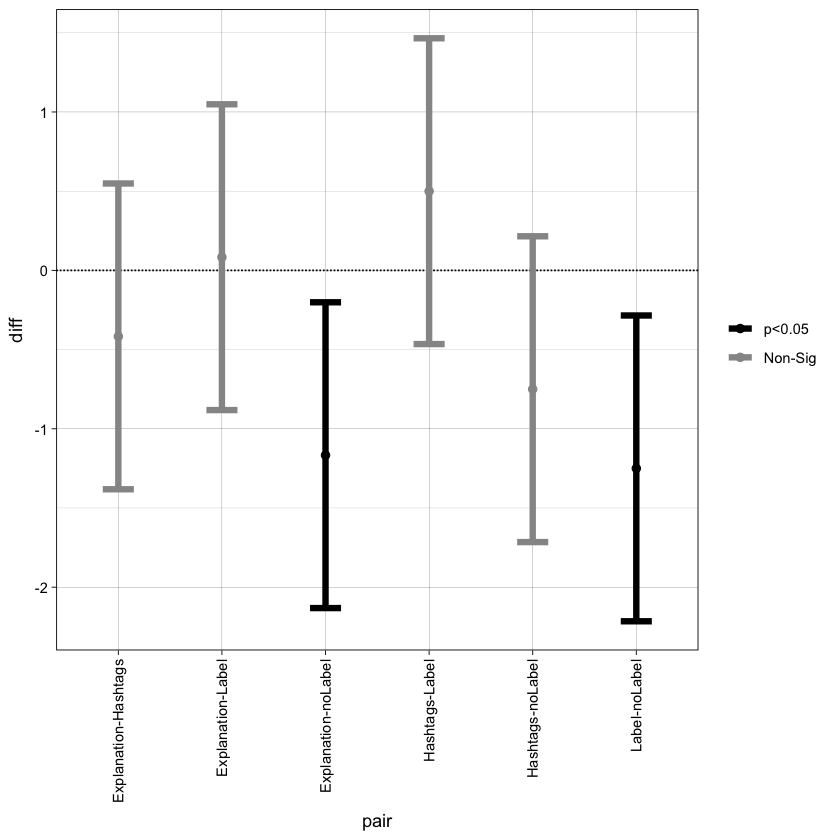

In [133]:

ggplot(fsa_posthocDF, aes( colour=cut(`p adj`, c(0, 0.03, 0.05, 1), 
                           label=c("p<0.05","p<0.05","Non-Sig")))) +
  geom_hline(yintercept=0, lty="11", colour="black") +
  geom_errorbar(aes(pair, ymin=lwr, ymax=upr), width=0.3, size=1.8) +
  geom_point(aes(pair, diff), size=2) +
  labs(colour="") +theme_linedraw()+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +  scale_color_manual(values = c("black", "grey59"))
  ggsave("./Figures/CD_HSD.pdf", dpi=300)

### ANOVA Across labels

In [97]:


# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = label_df)

# Combine the dummy variables with the original dataset (optional)
label_dummies <- cbind(label_df, dummies)

In [100]:
Fsa_labe_dummies.model <- fsa_score ~ conditionLabel+ conditionnoLabel 
Fsa_mean.fit <- lm(Fsa_labe_dummies.model, data = label_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_labe_dummies.model, data = label_dummies)

Residuals:
   Min     1Q Median     3Q    Max 
-3.283 -1.283 -1.033  2.717  3.967 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.2833     0.2642  27.570   <2e-16 ***
conditionLabel    -1.2500     0.3736  -3.346   0.0011 ** 
conditionnoLabel       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.046 on 118 degrees of freedom
Multiple R-squared:  0.08665,	Adjusted R-squared:  0.07891 
F-statistic: 11.19 on 1 and 118 DF,  p-value: 0.001101



In [103]:
## Anova test 
anova_label_FSA= aov(Fsa_labe_dummies.model, data = label_dummies)
summary(anova_label_FSA)

                Df Sum Sq Mean Sq F value Pr(>F)   
conditionLabel   1   46.9   46.88   11.19 0.0011 **
Residuals      118  494.1    4.19                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### ANOVA Across llms

In [114]:


# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = llm_df)

# Combine the dummy variables with the original dataset (optional)
llm_dummies <- cbind(llm_df, dummies)

In [115]:
Fsa_llm_dummies.model <- fsa_score ~ conditionExplanation+conditionHashtags
Fsa_mean.fit <- lm(Fsa_llm_dummies.model, data = llm_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_llm_dummies.model, data = llm_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5333 -1.1167 -0.5333 -0.1167  4.8833 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.5333     0.2634  24.806   <2e-16 ***
conditionExplanation  -0.4167     0.3725  -1.119    0.266    
conditionHashtags          NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.04 on 118 degrees of freedom
Multiple R-squared:  0.01049,	Adjusted R-squared:  0.002108 
F-statistic: 1.251 on 1 and 118 DF,  p-value: 0.2656



In [117]:
## Anova test 
anova_label_FSA= aov(Fsa_llm_dummies.model, data = llm_dummies)
summary(anova_label_FSA)

                      Df Sum Sq Mean Sq F value Pr(>F)
conditionExplanation   1    5.2   5.208   1.251  0.266
Residuals            118  491.1   4.162               

## Confirmatory Factor Analysis

### Food Knowledge

### Sustainabilty


### Choice Satisfaction

### Choice difficulty

### Perceived Effort

### Understandability

### Satisfaction

### Effectiveness

### Persuasiveness